In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
print( cv.__version__ )

4.7.0


1.显示图片

In [3]:
img = cv.imread("img/01.jpg", 0)

In [10]:
img = cv.imread("img/01.jpg", 0)
cv.imshow("输出的图片", img)
# cv.waitKey(10000)
c = cv.waitKey(0)
if c==27 or c == ord('q'):
    cv.destroyAllWindows()
elif c==ord('s'):
    cv.imwrite('other_save.png', img)
    cv.destroyAllWindows()

2.显示视频

In [ ]:
framewidth = 640
frameheight = 480
fps = 100 # 设置帧率

# 其中propId是0到18之间的一个数字。每个数字表示视频的属性
# cap.set(propID, value)

# cap = cv2.VideoCapture("video/test01.avi")
cap = cv.VideoCapture(0, cv.CAP_DSHOW)
cap.set(cv.CAP_PROP_FRAME_WIDTH, framewidth) #id-3
cap.set(cv.CAP_PROP_FRAME_HEIGHT, frameheight) #id-4
cap.set(cv.CAP_PROP_FPS, fps) #id-5
cap.set(cv.CAP_PROP_BRIGHTNESS, 1) #id-10

if not cap.isOpened():
    print("无法打开摄像头！")
    exit()
while True:
    success, img = cap.read()
    if not success:
        print("不能读取视频帧!")
        break
    cv.imshow("video", img)
    # gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # cv.imshow("gray", gray)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

In [ ]:
# example
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)
# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('output.avi', fourcc, 20.0, (640,  480))
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # frame = cv.flip(frame, 0)
    # write the flipped frame
    out.write(frame)
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break
# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()

3.色彩转换

In [ ]:
kernel = np.ones((5, 5), np.uint8)
img = cv.imread("img/03.jpg")

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_blur = cv.GaussianBlur(img, (7, 7), 0)
img_canny = cv.Canny(img, 150, 200) # 边缘检测
img_dilation = cv.dilate(img_gray, kernel, iterations=1) # 迭代一次
img_erode = cv.erode(img_gray, kernel, iterations=1) # 迭代一次

# cv.imshow("name01", img_gray)
# cv.imshow("blur", img_blur)
cv.imshow("canny", img_canny)
cv.imshow("canny_dilation", img_dilation)
cv.imshow("canny_erode", img_erode)

c = cv.waitKey(0)
cv.destroyAllWindows()

4.尺寸变换

In [ ]:
img = cv.imread("img/01.jpg")
print(img)
print(img.shape)

In [3]:
# 只是更改显示的尺寸
img_resize = cv.resize(img, (300, 480))
cv.imshow("Image", img)
cv.imshow("Image_resize", img_resize)
cv.waitKey(0)
cv.destroyAllWindows()

In [7]:
# 裁剪
img_cropped = img[0:500, 1000:1200]
cv.imwrite("crop_500_200.jpg", img_cropped)
cv.imshow("裁剪:", img_cropped)
cv.waitKey(0)
cv.destroyAllWindows()

5.绘制图像

In [13]:
# [0, 256)
img = np.random.randint(0, 256, (512, 500, 3), dtype=np.uint8)
img[:] = 255, 255, 1
# img = cv.imread("img/01.jpg")
print(img.shape)
# print(img[0][0])

# 定义线，起点；终点；颜色; 粗细
# img.shape=(高， 宽)
cv.line(img, (0,0), (img.shape[0], img.shape[1]), (0, 0, 255), 1)
cv.putText(img, "demo_test", (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 1)

cv.imshow("define_image", img)
cv.waitKey(0)

cv.destroyAllWindows()

(512, 500, 3)


6.透视变换

7.堆叠

In [10]:
img = cv.imread("img/03.jpg")
hor = np.hstack((img, img))
cv.imshow("hor", hor)
cv.waitKey(0)
cv.destroyAllWindows()

8.鼠标操作

In [4]:
events = [i for i in dir(cv) if 'EVENT' in i]
print( events )

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


9.基本操作

In [18]:
img = cv.imread("img/01.jpg")
px = img[100, 100] # 一个彩色单元的内容
print(px)
px_value = img[100, 100, 0] # BGR格式，对应0-B,1-G,2-R
print("blue elemnet value is: ", px_value)

[ 32 137  56]
blue elemnet value is:  32


In [19]:
# 借助 item 访问
px = img.item(100, 100, 0)
print(px)
# 重新设置相关的值
new_px = img.itemset((100, 100, 0), 120)
px_modify = img.item(100, 100, 0)
print(px_modify)

32
120


In [20]:
# 访问属性
# img = cv.imread("img/01.jpg", 0)
print(img.shape)
print(img.dtype)
print(img.size)
# print(1440*1920*3), imgsize 为总数相乘

(1440, 1920, 3)
uint8
8294400


In [40]:
# print(340-280, 333-273)
# 图片分割,将图中的足球分割出来
img = cv.imread("img/roi_test.jpg")
print(img.shape) # 输出高，宽
ball = img[220:280, 330:390]
# print(ball)
img[213:273, 85:145] = ball

cv.imshow('a', img)
cv.waitKey(0)
cv.destroyAllWindows()

(280, 450, 3)


In [48]:
# 通道数的分离和合并
b,g,r = cv.split(img)
img = cv.merge((b,g,r))
# 或采用切片操作
b = img[:, :, 0]

# 使得B 和 R通道为0
img[:,:,2] = 0
img[:,:,0] = 0

cv.imshow('a', img)
cv.waitKey(0)
cv.destroyAllWindows()

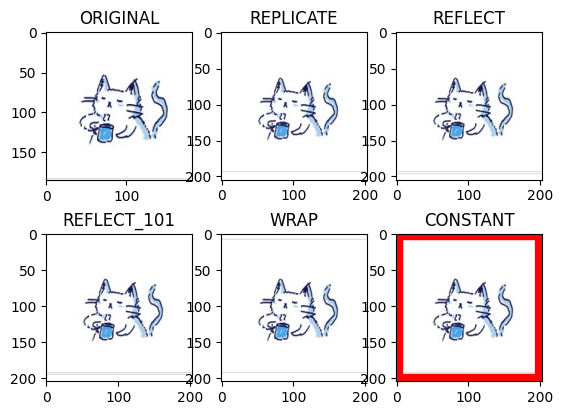

In [52]:
# 边界填充
BLUE = [255,0,0]
img = cv.imread("img/03.jpg")
# (src, top, bottom, left, right, bodertype)
replicate = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)


plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

10.几何操作 

In [59]:
# modulo operation 和 saturated operation
x = np.uint8([250])
y = np.uint8([10])

print(x)
print(y)

print("saturated", cv.add(x, y))
print("modulo", x + y)

[250]
[10]
saturated [[255]]
modulo [4]


In [66]:
# 图片融合操作
img1 = cv.imread("img/01.jpg")
print(img1.shape)
img2 = cv.imread("img/02.jpg")
print(img2.shape)
img2 = img2[0:img1.shape[0], 0:img1.shape[1]]

dst = cv.addWeighted(img1,0.1,img2,0.8,0)

cv.imshow('dst', dst)
cv.waitKey(0)
cv.destroyAllWindows()

(1440, 1920, 3)
(2880, 5120, 3)


In [10]:
# 图片位操作
logo = cv.imread("img/opencv-logo-white.jpg")
main_img = cv.imread("img/roi_test.jpg")
rows, cols, channels = logo.shape
roi = main_img[0:rows, 0:cols]

logo_gray = cv.cvtColor(logo, cv.COLOR_BGR2GRAY)
# 转换为二值图像，10-阈值，255-填充色，0黑
# 使用固定阈值进行二值处理,大于时取 255，反之取 0；
ret, mask = cv.threshold(logo_gray, 30, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask) # 取反

main_bg = cv.bitwise_and(roi, roi, mask=mask_inv)
logo_fg = cv.bitwise_and(logo, logo, mask=mask)
dst = cv.add(logo_fg, main_bg)
main_img[0:rows, 0:cols ] = dst


# cv.imshow('dst', dst)
cv.imshow('image_mask', main_img)
cv.waitKey(0)
cv.destroyAllWindows()
